<a href="https://colab.research.google.com/github/Gopal2696/New-york-city-taxi-trip-duration/blob/master/Taxi_trip_duration.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#data dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,10]

import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split #better for train_test_split

%matplotlib inline
plt.rcParams["axes.unicode_minus"] = False   #fits inside screen 


In [0]:
#authenticate_from_google

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# train - 1fuFU_Zw1xo1sbvGIeC6hOhe6zNEKdpg2
# train - 1fuFU_Zw1xo1sbvGIeC6hOhe6zNEKdpg2

train_downloaded = drive.CreateFile({'id': '1fuFU_Zw1xo1sbvGIeC6hOhe6zNEKdpg2'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1fuFU_Zw1xo1sbvGIeC6hOhe6zNEKdpg2'})
test_downloaded.GetContentFile('test.csv')

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [0]:
#data preprocessing

## how long is the average trip
 
df_train["log_trip_duration"] = np.log(df_train["trip_duration"].values + 1) 

<function matplotlib.pyplot.show>

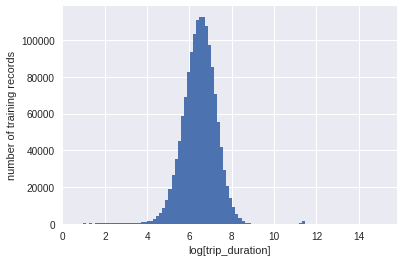

In [0]:
plt.hist(df_train['log_trip_duration'].values , bins=100)
plt.xlabel('log[trip_duration]')
plt.ylabel('number of training records')
plt.show

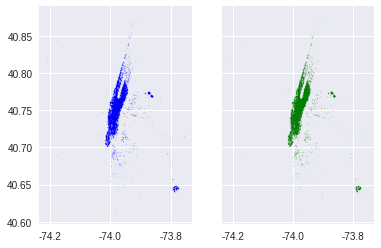

In [0]:
N = 10000
city_long_border = (-75,-75)
city_lat_border = (40,40)
fig, ax = plt.subplots(ncols = 2, sharex=True,sharey=True)
ax[0].scatter(df_train["pickup_longitude"].values[:N] , 
              df_train["pickup_latitude"].values[:N], color ='blue',
              s=1, label='train', alpha = 0.1)
ax[1].scatter(df_test["pickup_longitude"].values[:N] , 
              df_test["pickup_latitude"].values[:N], color ='green',
              s=1, label='train', alpha = 0.1)
plt.show()

In [0]:

df_train.pickup_datetime = pd.to_datetime(df_train.pickup_datetime)
df_train.dropoff_datetime= pd.to_datetime(df_train.dropoff_datetime)
df_train['pu_hour'] = df_train.pickup_datetime.dt.hour
df_train['yday'] = df_train.pickup_datetime.dt.dayofyear
df_train['wday'] = df_train.pickup_datetime.dt.dayofweek
df_train['month'] = df_train.pickup_datetime.dt.month
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_hour,yday,wday,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,74,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,164,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,97,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,86,5,3


In [0]:
#training the model
feature_names = ['vendor_id','pu_hour','yday','wday','month','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude']
y = np.log(df_train["trip_duration"].values + 1 )
Xtr, Xtv, ytr, ytv = train_test_split(df_train[feature_names].values, y, test_size=0.2, random_state = 1987 )


# xgb_pars = 
# Xtr

In [0]:
# reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)

# # cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
# # print(cross_val_score(reg, features, np.ravel(target), cv=cv,scoring=rmsle))
# reg.fit(Xtr,ytr)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pu_hour               1458644 non-null int64
yday                  1458644 non-null int64
wday                  1458644 non-null int64
month                 1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(7), object(2)
memory usage: 166.9+ MB


In [0]:
labels=[]
values=[]
string =[]
for col in df_train.columns:
  labels.append(col)
  values.append(df_train[col].isnull().sum())
  print(col,values[-1])
  
print(labels)
# for col in df_train.columns:
#   string.append(df_train[col].isstr.sum())
#   print(col,string[-1])

id 0
vendor_id 0
pickup_datetime 0
dropoff_datetime 0
passenger_count 0
pickup_longitude 0
pickup_latitude 0
dropoff_longitude 0
dropoff_latitude 0
store_and_fwd_flag 0
trip_duration 0
pu_hour 0
yday 0
wday 0
month 0
['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'pu_hour', 'yday', 'wday', 'month']


In [0]:
reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
# print(cross_val_score(reg, features, np.ravel(target), cv=cv,scoring=rmsle))
reg.fit(Xtr,ytr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [0]:
pred = reg.predict(Xtv)


In [0]:
import tensorflow as tf


In [0]:
weather_downloaded = drive.CreateFile({'id': '1Ha8r-LGnnb_vbXDAbxfVFwwdM3hcRxQ4'})
weather_downloaded.GetContentFile('weather_data_nyc_centralpark_2016(1).csv')

In [0]:
weather_data = pd.read_csv('weather_data_nyc_centralpark_2016(1).csv')

In [0]:
weather_data.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [0]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
date                   366 non-null object
maximum temperature    366 non-null int64
minimum temperature    366 non-null int64
average temperature    366 non-null float64
precipitation          366 non-null object
snow fall              366 non-null object
snow depth             366 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


In [0]:
df_train['pickup_date'] = df_train['pickup_datetime'].dt.strftime('%d-%m-%Y')

df_train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_hour,yday,wday,month,pickup_date,dropoff_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,74,0,3,14-03-2016,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,164,6,6,12-06-2016,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1,19-01-2016,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,97,2,4,06-04-2016,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,86,5,3,26-03-2016,2016-03-26


In [0]:
df_train["dropoff_date"] = df_train["dropoff_datetime"].dt.date

In [0]:
weather_data["date"] = pd.to_datetime(weather_data["date"])

In [0]:
weather_data.info()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
date                   366 non-null datetime64[ns]
maximum temperature    366 non-null int64
minimum temperature    366 non-null int64
average temperature    366 non-null float64
precipitation          366 non-null object
snow fall              366 non-null object
snow depth             366 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 20.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_

In [0]:
weather_data["yday"] = weather_data.date.dt.dayofyear 

In [0]:
weather_data.head()
df_train = pd.merge(df_train, weather_data, on = "yday" )

[[False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False F

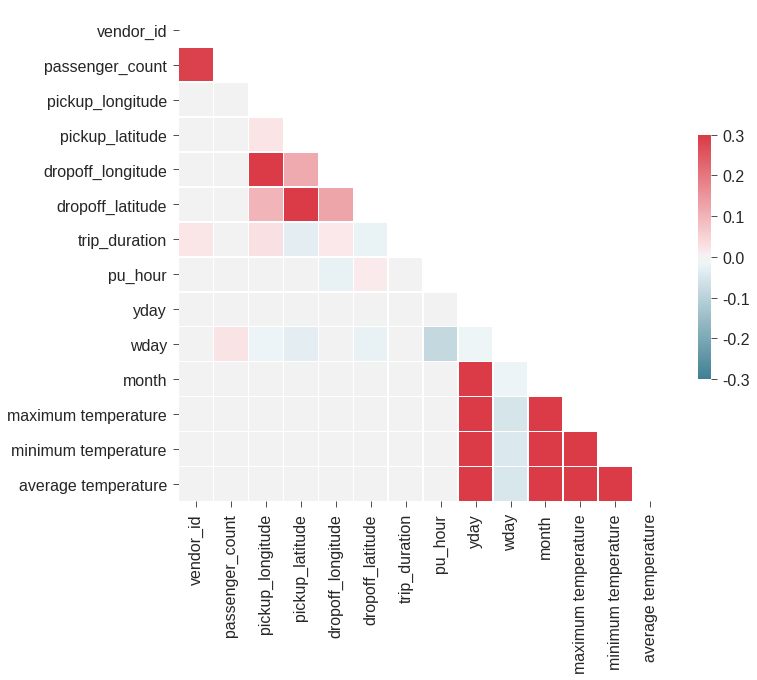

In [0]:

sns.set_style('ticks')
sns.set_context("paper",font_scale=2)
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
# print(mask)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink":0.5} )


In [0]:
corr = df_train.corr()
corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pu_hour,yday,wday,month,maximum temperature,minimum temperature,average temperature
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304,0.009299,-0.006025,0.001311,-0.006221,-0.004615,-0.004637,-0.004684
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471,0.009101,-0.001784,0.025191,-0.002143,-0.001776,-0.002136,-0.001974
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542,0.010150,0.004263,-0.016356,0.004474,0.002859,0.002715,0.002825
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204,0.010603,-0.002516,-0.028976,-0.001439,-0.000074,0.000603,0.000255
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678,-0.022455,0.004612,-0.001130,0.004758,0.003436,0.003411,0.003466
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677,0.013612,-0.001554,-0.021762,-0.000607,0.000286,0.000702,0.000492
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000,0.003690,0.006625,-0.000708,0.006607,0.001066,0.000736,0.000918
pu_hour,0.009299,0.009101,0.010150,0.010603,-0.022455,0.013612,0.003690,1.000000,-0.003340,-0.084255,-0.003438,0.002199,-0.000188,0.001065
yday,-0.006025,-0.001784,0.004263,-0.002516,0.004612,-0.001554,0.006625,-0.003340,1.000000,-0.013615,0.985657,0.516168,0.464570,0.497521
wday,0.001311,0.025191,-0.016356,-0.028976,-0.001130,-0.021762,-0.000708,-0.084255,-0.013615,1.000000,-0.014544,-0.051577,-0.042508,-0.047809
